<a href="https://colab.research.google.com/github/NREL/BEEAM/blob/develop/FMU/flexlab_demo/5_notebooks/data_FL_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose
Makes plots of cleaned data from experiments.

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# import libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Setup

In [3]:
# set to False if using private data from the research team
public = True

# dirs
if public:
  csv_dir = '/content/drive/My Drive/BEEAM FLEXLAB Supporting Data/1 Data Plots'
  out_dir = '/content/drive/My Drive'
else:
  base = '/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation'
  csv_dir = base + '/FLEXLAB/FL_Data/Final'
  out_dir = base + '/Journal Articles/Whole-Building/Graphics'
print(csv_dir)
print(out_dir)

# files
elec_csv = 'elec_15min.csv'
mech_flow_csv = 'mech_flow_15min.csv'
mech_power_csv = 'mech_power_15min.csv'
mech_temp_csv = 'mech_temp_15min.csv'

# paths
elec_path = os.path.join(csv_dir, elec_csv)
mech_flow_path = os.path.join(csv_dir, mech_flow_csv)
mech_power_path = os.path.join(csv_dir, mech_power_csv)
mech_temp_path = os.path.join(csv_dir, mech_temp_csv)

# timestamp column name
timestamp_col_name = 'datetime'

# architectural calibration
arch_cal_beg = '2020-10-30 00:00:00'
arch_cal_end = '2020-11-04 15:00:00'

# mechanical calibration
mech_cal_beg = '2020-11-04 16:45:00'
mech_cal_end = '2020-11-06 15:00:00'

# ac experiment
ac_exp_beg = '2020-11-11 10:30:00'
ac_exp_end = '2020-11-16 08:00:00'

# dc experiment
dc_exp_beg = '2020-11-17 18:00:00'
dc_exp_end = '2020-11-30 08:00:00'

/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/FLEXLAB/FL_Data/Final
/content/drive/Shared drives/NREL DC Design Tool/Tasks/7 Validation/7.2 Whole Tool Validation/Journal Articles/Whole-Building/Graphics


# Extract

In [4]:
# electrical data
elec_df = pd.read_csv(elec_path)
elec_df

,datetime,lights_zone,lights_plnm,plugs_zone,plugs_zone_converters,misc_zone,dc_hub,fans_zone,fans_plnm
0,2020-10-30 00:00:00,0.204444,0.0,94.422142,0.0,79.670357,0,192.213695,0.000000e+00
1,2020-10-30 00:15:00,0.204139,0.0,96.747868,0.0,79.862122,0,191.986834,0.000000e+00
2,2020-10-30 00:30:00,0.204015,0.0,94.834101,0.0,79.392693,0,191.853262,8.890000e-06
3,2020-10-30 00:45:00,0.203729,0.0,94.245913,0.0,79.360358,0,191.604688,0.000000e+00
4,2020-10-30 01:00:00,0.204050,0.0,96.294606,0.0,79.619058,0,191.750179,3.827778e-07
...,...,...,...,...,...,...,...,...,...
3067,2020-11-30 22:45:00,0.000000,0.0,0.000000,0.0,8.225446,0,0.091621,0.000000e+00
3068,2020-11-30 23:00:00,0.000000,0.0,0.000000,0.0,8.288269,0,0.091812,9.124444e-06
3069,2020-11-30 23:15:00,0.000000,0.0,0.000000,0.0,8.217951,0,0.092052,0.000000e+00
3070,2020-11-30 23:30:00,0.000000,0.0,0.000000,0.0,8.204435,0,0.092067,0.000000e+00


In [5]:
# mechanical flow data
mech_flow_df = pd.read_csv(mech_flow_path)
mech_flow_df

,datetime,supply_air_flow,return_air_flow,outdoor_air_flow
0,2020-10-30 00:00:00,-0.748042,-0.214010,2.315144
1,2020-10-30 00:15:00,-0.562276,-0.214422,1.476842
2,2020-10-30 00:30:00,-0.684948,-0.209614,1.578260
3,2020-10-30 00:45:00,-0.615564,-0.216693,2.172689
4,2020-10-30 01:00:00,-0.739524,-0.230410,2.066980
...,...,...,...,...
3067,2020-11-30 22:45:00,2276.388042,2068.643138,NaN
3068,2020-11-30 23:00:00,2277.573937,2074.517797,NaN
3069,2020-11-30 23:15:00,2277.442095,2077.132501,NaN
3070,2020-11-30 23:30:00,2268.050464,2065.854072,NaN


In [6]:
# mechanical power data
mech_power_df = pd.read_csv(mech_power_path)
mech_power_df

,datetime,HVAC_Thermal_Load,air_handler_fan_wattage
0,2020-10-30 00:00:00,27.090496,28.605512
1,2020-10-30 00:15:00,27.062497,28.579661
2,2020-10-30 00:30:00,27.075709,28.585916
3,2020-10-30 00:45:00,27.063205,28.561234
4,2020-10-30 01:00:00,26.891187,28.580654
...,...,...,...
3067,2020-11-30 22:45:00,512.492496,511.986367
3068,2020-11-30 23:00:00,512.656733,512.107709
3069,2020-11-30 23:15:00,559.993700,512.140513
3070,2020-11-30 23:30:00,1897.159625,510.360990


In [7]:
# mechanical temperature data
mech_temp_df = pd.read_csv(mech_temp_path)
mech_temp_df

,datetime,thermostats,supply_air_temp,return_air_temp
0,2020-10-30 00:00:00,25.252812,25.179679,25.295049
1,2020-10-30 00:15:00,25.319284,25.231020,25.359824
2,2020-10-30 00:30:00,25.377985,25.278628,25.403328
3,2020-10-30 00:45:00,25.428087,25.306824,25.452837
4,2020-10-30 01:00:00,25.453755,25.366373,25.498462
...,...,...,...,...
3067,2020-11-30 22:45:00,22.463556,22.700973,22.509493
3068,2020-11-30 23:00:00,22.474974,22.735572,22.548047
3069,2020-11-30 23:15:00,22.484605,22.747459,22.570407
3070,2020-11-30 23:30:00,22.558073,23.477529,23.020424


# Transform

In [8]:
# convert timestamp column to datetime format and set as index

# array of dataframes
df_list = [elec_df,
           mech_flow_df,
           mech_power_df,
           mech_temp_df]

# loop through dataframes
for df in df_list:

  # convert timestamp column to datetime format
  df['datetime'] = pd.to_datetime(df['datetime'])

  # set index
  df.set_index('datetime', inplace=True)

## Mechanical Power Data

In [9]:
mech_power_df.describe()

,HVAC_Thermal_Load,air_handler_fan_wattage
count,2884.000000,2898.000000
mean,-507.709778,387.777193
std,808.643866,214.212397
min,-9712.583964,-0.007224
25%,-729.658686,29.096052
50%,-358.261234,511.961770
75%,27.525418,514.517872
max,3632.833959,535.726339


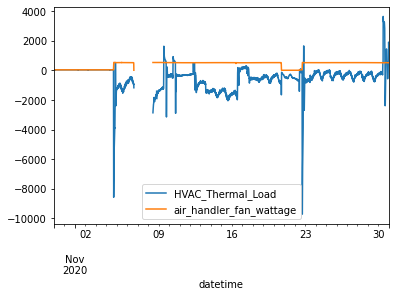

In [10]:
mech_power_df.plot()

In [11]:
# add heating or cooling mode based on thermal load's sign
mech_power_df.loc[mech_power_df['HVAC_Thermal_Load'] > 0, 'mode'] = 'heating'
mech_power_df.loc[mech_power_df['HVAC_Thermal_Load'] < 0, 'mode'] = 'cooling'
mech_power_df

,HVAC_Thermal_Load,air_handler_fan_wattage,mode
datetime,,,
2020-10-30 00:00:00,27.090496,28.605512,heating
2020-10-30 00:15:00,27.062497,28.579661,heating
2020-10-30 00:30:00,27.075709,28.585916,heating
2020-10-30 00:45:00,27.063205,28.561234,heating
2020-10-30 01:00:00,26.891187,28.580654,heating
...,...,...,...
2020-11-30 22:45:00,512.492496,511.986367,heating
2020-11-30 23:00:00,512.656733,512.107709,heating
2020-11-30 23:15:00,559.993700,512.140513,heating


## Mechanical Temp Data

In [12]:
# add mode to temp dataframe
mech_temp_df['mode'] = mech_power_df['mode']
mech_temp_df

,thermostats,supply_air_temp,return_air_temp,mode
datetime,,,,
2020-10-30 00:00:00,25.252812,25.179679,25.295049,heating
2020-10-30 00:15:00,25.319284,25.231020,25.359824,heating
2020-10-30 00:30:00,25.377985,25.278628,25.403328,heating
2020-10-30 00:45:00,25.428087,25.306824,25.452837,heating
2020-10-30 01:00:00,25.453755,25.366373,25.498462,heating
...,...,...,...,...
2020-11-30 22:45:00,22.463556,22.700973,22.509493,heating
2020-11-30 23:00:00,22.474974,22.735572,22.548047,heating
2020-11-30 23:15:00,22.484605,22.747459,22.570407,heating


## Separate Data

In [13]:
# separate dataframes by calibration/experiment period

# electrical data
elec_arch_cal_df = elec_df[arch_cal_beg:arch_cal_end]
elec_mech_cal_df = elec_df[mech_cal_beg:mech_cal_end]
elec_ac_exp_df = elec_df[ac_exp_beg:ac_exp_end]
elec_dc_exp_df = elec_df[dc_exp_beg:dc_exp_end]

# mechanical data
mech_flow_arch_cal_df = mech_flow_df[arch_cal_beg:arch_cal_end]
mech_flow_mech_cal_df = mech_flow_df[mech_cal_beg:mech_cal_end]
mech_flow_ac_exp_df = mech_flow_df[ac_exp_beg:ac_exp_end]
mech_flow_dc_exp_df = mech_flow_df[dc_exp_beg:dc_exp_end]

mech_power_arch_cal_df = mech_power_df[arch_cal_beg:arch_cal_end]
mech_power_mech_cal_df = mech_power_df[mech_cal_beg:mech_cal_end]
mech_power_ac_exp_df = mech_power_df[ac_exp_beg:ac_exp_end]
mech_power_dc_exp_df = mech_power_df[dc_exp_beg:dc_exp_end]

mech_temp_arch_cal_df = mech_temp_df[arch_cal_beg:arch_cal_end]
mech_temp_mech_cal_df = mech_temp_df[mech_cal_beg:mech_cal_end]
mech_temp_ac_exp_df = mech_temp_df[ac_exp_beg:ac_exp_end]
mech_temp_dc_exp_df = mech_temp_df[dc_exp_beg:dc_exp_end]

In [14]:
elec_arch_cal_df.describe()

,lights_zone,lights_plnm,plugs_zone,plugs_zone_converters,misc_zone,dc_hub,fans_zone,fans_plnm
count,541.000000,541.0,541.000000,541.0,541.000000,541.0,541.000000,5.410000e+02
mean,0.355898,0.0,431.557611,0.0,81.539072,0.0,189.748664,5.152682e-06
std,2.469458,0.0,84.738035,0.0,0.783364,0.0,1.212511,8.031549e-06
min,0.106089,0.0,94.245913,0.0,79.156056,0.0,185.868431,0.000000e+00
25%,0.204388,0.0,452.915640,0.0,81.230794,0.0,188.954100,5.666667e-08
50%,0.205763,0.0,453.200071,0.0,81.742383,0.0,189.860568,3.172222e-06
75%,0.207087,0.0,453.514111,0.0,82.047185,0.0,190.596053,7.251111e-06
max,42.424114,0.0,454.169203,0.0,86.038718,0.0,192.457048,1.117589e-04


In [15]:
elec_mech_cal_df.describe()

,lights_zone,lights_plnm,plugs_zone,plugs_zone_converters,misc_zone,dc_hub,fans_zone,fans_plnm
count,186.000000,186.0,186.000000,186.0,186.000000,186.0,186.000000,186.000000
mean,3.176768,0.0,452.093108,0.0,78.470137,0.0,192.397209,0.000020
std,17.962163,0.0,0.432181,0.0,0.774835,0.0,1.424476,0.000095
min,0.203466,0.0,450.977331,0.0,77.737975,0.0,186.848790,0.000000
25%,0.207735,0.0,451.810645,0.0,78.159793,0.0,191.594466,0.000002
50%,0.209532,0.0,452.186494,0.0,78.329160,0.0,192.736686,0.000007
75%,0.211530,0.0,452.452211,0.0,78.472535,0.0,193.344162,0.000012
max,115.393730,0.0,452.761079,0.0,84.495000,0.0,194.554064,0.000778


In [16]:
elec_ac_exp_df.describe()

,lights_zone,lights_plnm,plugs_zone,plugs_zone_converters,misc_zone,dc_hub,fans_zone,fans_plnm
count,471.000000,471.0,471.000000,471.0,471.000000,471.0,471.000000,471.000000
mean,262.741802,0.0,1030.636943,0.0,65.962177,0.0,191.848417,56.977804
std,63.488248,0.0,421.537734,0.0,3.571681,0.0,0.925047,13.718625
min,20.386535,0.0,90.000000,0.0,13.389375,0.0,188.451551,31.709090
25%,272.567746,0.0,930.000000,0.0,66.026242,0.0,191.312409,64.086152
50%,305.756839,0.0,1350.000000,0.0,66.618391,0.0,191.959749,64.461202
75%,305.881602,0.0,1350.000000,0.0,66.847471,0.0,192.507616,64.587033
max,306.227705,0.0,1350.000000,0.0,70.474550,0.0,194.155203,64.832174


In [17]:
elec_dc_exp_df.describe()

,lights_zone,lights_plnm,plugs_zone,plugs_zone_converters,misc_zone,dc_hub,fans_zone,fans_plnm
count,1209.000000,1209.0,1209.000000,1209.0,1209.000000,1209.0,1208.000000,1209.000000
mean,185.859408,0.0,414.583418,0.0,163.229856,0.0,191.360160,64.204472
std,4.992793,0.0,130.341106,0.0,9.034412,0.0,2.214040,1.921720
min,12.400200,0.0,120.595000,0.0,43.567912,0.0,172.404878,34.469197
25%,186.003000,0.0,359.261000,0.0,161.962962,0.0,190.682094,64.271065
50%,186.003000,0.0,359.294000,0.0,166.091904,0.0,191.715569,64.423397
75%,186.003000,0.0,542.068000,0.0,166.921084,0.0,192.472401,64.550469
max,186.003000,0.0,542.695133,0.0,190.312339,0.0,194.927420,65.013359


# Load

In [18]:
# set theme
sns.set_theme()

# set kind
kind = 'line'

# set aspect
aspect = 1

# set axis labels
xlabel = 'Date'
elec_ylabel = 'Electrical Load (W)'
mech_flow_ylabel = 'Airflow Rate ($\mathregular{m^3/h}$)'
mech_power_ylabel = 'Mechanical Load (W)'
mech_temp_ylabel = 'Temperature (C)'

# figure size for subplot figure
figsize = (10, 10)

## Electrical Plots

### Architectural Calibration

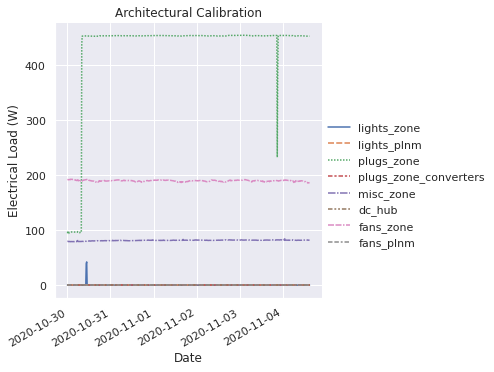

In [19]:
arch_cal_plot = sns.relplot(data=elec_arch_cal_df, kind=kind, aspect=aspect)
arch_cal_plot.fig.autofmt_xdate()
arch_cal_plot.set(title='Architectural Calibration', xlabel=xlabel, ylabel=elec_ylabel)

### Mechanical Calibration

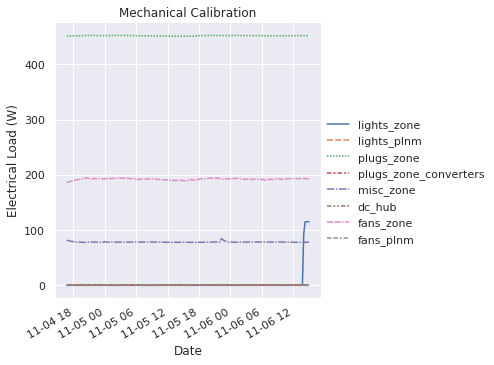

In [20]:
mech_cal_plot = sns.relplot(data=elec_mech_cal_df, kind=kind, aspect=aspect)
mech_cal_plot.fig.autofmt_xdate()
mech_cal_plot.set(title='Mechanical Calibration', xlabel=xlabel, ylabel=elec_ylabel)

### AC Experiment

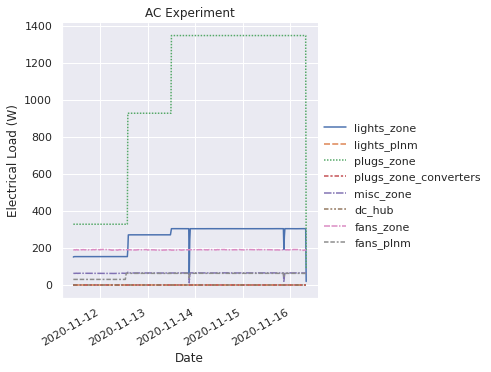

In [21]:
ac_exp_plot = sns.relplot(data=elec_ac_exp_df, kind=kind, aspect=aspect)
ac_exp_plot.fig.autofmt_xdate()
ac_exp_plot.set(title='AC Experiment', xlabel=xlabel, ylabel=elec_ylabel)

### DC Experiment

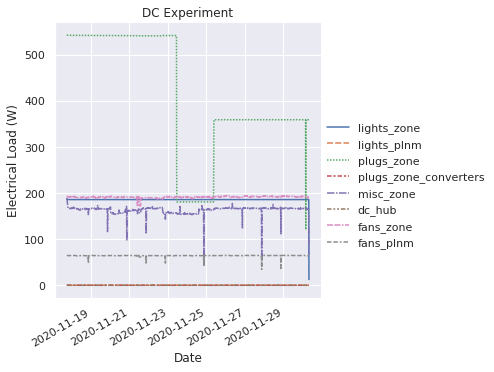

In [22]:
dc_exp_plot = sns.relplot(data=elec_dc_exp_df, kind=kind, aspect=aspect)
dc_exp_plot.fig.autofmt_xdate()
dc_exp_plot.set(title='DC Experiment', xlabel=xlabel, ylabel=elec_ylabel)

### Combined

In [23]:
elec_cols_for_fig = ['lights_zone',
                     'plugs_zone',
                     'misc_zone',
                     'fans_zone',
                     'fans_plnm']

lights = 'Lights'
plugs = 'Programmable Plugs'
misc = 'Miscellaneous'
fans_zone = 'Fans (Zone)'
fans_plnm = 'Fans (Plenum)'

rename_cols_dict = {'lights_zone':lights,
                    'plugs_zone':plugs,
                    'misc_zone':misc,
                    'fans_zone':fans_zone,
                    'fans_plnm':fans_plnm}

bldg_model_elec_arch_cal = pd.DataFrame(elec_arch_cal_df[elec_cols_for_fig])
bldg_model_elec_arch_cal.rename(columns=rename_cols_dict, inplace=True)

bldg_model_elec_mech_cal = pd.DataFrame(elec_mech_cal_df[elec_cols_for_fig])
bldg_model_elec_mech_cal.rename(columns=rename_cols_dict, inplace=True)

bldg_model_elec_ac_exp = pd.DataFrame(elec_ac_exp_df[elec_cols_for_fig])
bldg_model_elec_ac_exp.rename(columns=rename_cols_dict, inplace=True)

bldg_model_elec_dc_exp = pd.DataFrame(elec_dc_exp_df[elec_cols_for_fig])
bldg_model_elec_dc_exp.rename(columns=rename_cols_dict, inplace=True)

bldg_model_elec_arch_cal

,Lights,Programmable Plugs,Miscellaneous,Fans (Zone),Fans (Plenum)
datetime,,,,,
2020-10-30 00:00:00,0.204444,94.422142,79.670357,192.213695,0.000000e+00
2020-10-30 00:15:00,0.204139,96.747868,79.862122,191.986834,0.000000e+00
2020-10-30 00:30:00,0.204015,94.834101,79.392693,191.853262,8.890000e-06
2020-10-30 00:45:00,0.203729,94.245913,79.360358,191.604688,0.000000e+00
2020-10-30 01:00:00,0.204050,96.294606,79.619058,191.750179,3.827778e-07
...,...,...,...,...,...
2020-11-04 14:00:00,0.201278,452.415520,82.315996,185.868431,7.290000e-06
2020-11-04 14:15:00,0.206011,452.464564,81.858805,186.144460,1.019889e-05
2020-11-04 14:30:00,0.201629,452.405639,81.962030,185.956733,6.516667e-06


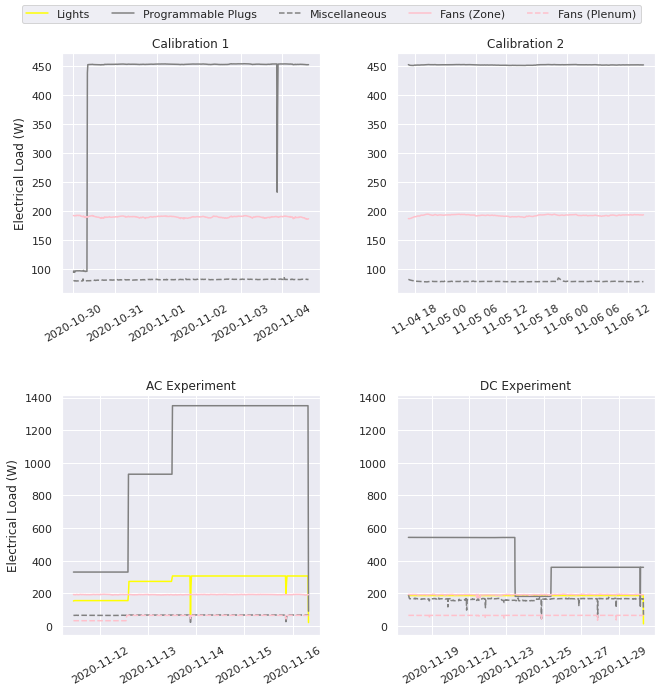

In [24]:
# figure
elec_fig = plt.figure(figsize=figsize)

# title
# elec_fig.suptitle('Electrical Loads')

elec_load_label = 'Electrical Load (W)'
rotation = 30

# axis 1: architectural calibration
elec_ax1 = plt.subplot(2, 2, 1)
elec_ax1.set_title('Calibration 1')
elec_ax1.set_ylabel(elec_load_label)
# elec_ax1.plot(bldg_model_elec_arch_cal.index, bldg_model_elec_arch_cal[lights], label=lights, color='yellow')
elec_ax1.plot(bldg_model_elec_arch_cal.index, bldg_model_elec_arch_cal[plugs], label=plugs, color='gray')
elec_ax1.plot(bldg_model_elec_arch_cal.index, bldg_model_elec_arch_cal[misc], label=misc, color='gray', linestyle='dashed')
elec_ax1.plot(bldg_model_elec_arch_cal.index, bldg_model_elec_arch_cal[fans_zone], label=fans_zone, color='pink')
# elec_ax1.plot(bldg_model_elec_arch_cal.index, bldg_model_elec_arch_cal[fans_plnm], label=fans_plnm, color='pink', linestyle='dashed')
plt.xticks(rotation=rotation)

# axis 2: mechanical calibration
elec_ax2 = plt.subplot(2, 2, 2, sharey=elec_ax1)
elec_ax2.set_title('Calibration 2')
# elec_ax2.plot(bldg_model_elec_mech_cal.index, bldg_model_elec_mech_cal[lights], label=lights, color='yellow')
elec_ax2.plot(bldg_model_elec_mech_cal.index, bldg_model_elec_mech_cal[plugs], label=plugs, color='gray')
elec_ax2.plot(bldg_model_elec_mech_cal.index, bldg_model_elec_mech_cal[misc], label=misc, color='gray', linestyle='dashed')
elec_ax2.plot(bldg_model_elec_mech_cal.index, bldg_model_elec_mech_cal[fans_zone], label=fans_zone, color='pink')
# elec_ax2.plot(bldg_model_elec_mech_cal.index, bldg_model_elec_mech_cal[fans_plnm], label=fans_plnm, color='pink', linestyle='dashed')
plt.xticks(rotation=rotation)

# axis 3: AC experiment
elec_ax3 = plt.subplot(2, 2, 3)
elec_ax3.set_title('AC Experiment')
elec_ax3.set_ylabel(elec_load_label)
elec_ax3.plot(bldg_model_elec_ac_exp.index, bldg_model_elec_ac_exp[lights], label=lights, color='yellow')
elec_ax3.plot(bldg_model_elec_ac_exp.index, bldg_model_elec_ac_exp[plugs], label=plugs, color='gray')
elec_ax3.plot(bldg_model_elec_ac_exp.index, bldg_model_elec_ac_exp[misc], label=misc, color='gray', linestyle='dashed')
elec_ax3.plot(bldg_model_elec_ac_exp.index, bldg_model_elec_ac_exp[fans_zone], label=fans_zone, color='pink')
elec_ax3.plot(bldg_model_elec_ac_exp.index, bldg_model_elec_ac_exp[fans_plnm], label=fans_plnm, color='pink', linestyle='dashed')
plt.xticks(rotation=rotation)

# axis 4: plenum temperature
elec_ax4 = plt.subplot(2, 2, 4, sharey=elec_ax3)
elec_ax4.set_title('DC Experiment')
elec_ax4.plot(bldg_model_elec_dc_exp.index, bldg_model_elec_dc_exp[lights], label=lights, color='yellow')
elec_ax4.plot(bldg_model_elec_dc_exp.index, bldg_model_elec_dc_exp[plugs], label=plugs, color='gray')
elec_ax4.plot(bldg_model_elec_dc_exp.index, bldg_model_elec_dc_exp[misc], label=misc, color='gray', linestyle='dashed')
elec_ax4.plot(bldg_model_elec_dc_exp.index, bldg_model_elec_dc_exp[fans_zone], label=fans_zone, color='pink')
elec_ax4.plot(bldg_model_elec_dc_exp.index, bldg_model_elec_dc_exp[fans_plnm], label=fans_plnm, color='pink', linestyle='dashed')
plt.xticks(rotation=rotation)

# format x-axis
# elec_fig.autofmt_xdate()

# add legend
handles, labels = elec_ax4.get_legend_handles_labels()
elec_fig.legend(handles, labels, loc='upper center', ncol=5)

# set layout
elec_fig.tight_layout(pad=3)

## Mechanical Plots

### Architectural Calibration

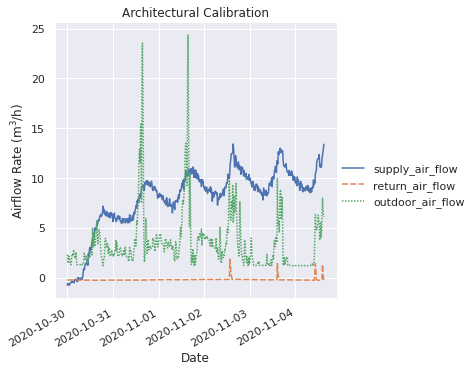

In [25]:
mech_flow_arch_cal_plot = sns.relplot(data=mech_flow_arch_cal_df, kind=kind, aspect=aspect)
mech_flow_arch_cal_plot.fig.autofmt_xdate()
mech_flow_arch_cal_plot.set(title='Architectural Calibration', xlabel=xlabel, ylabel=mech_flow_ylabel)

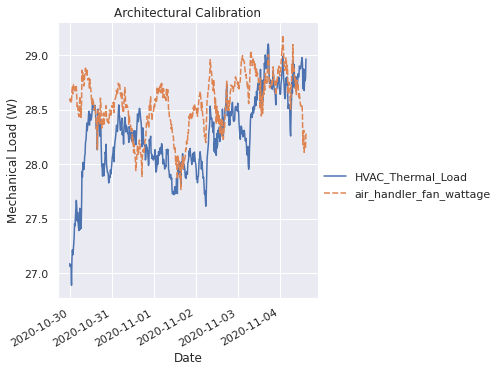

In [26]:
mech_power_arch_cal_plot = sns.relplot(data=mech_power_arch_cal_df, kind=kind, aspect=aspect)
mech_power_arch_cal_plot.fig.autofmt_xdate()
mech_power_arch_cal_plot.set(title='Architectural Calibration', xlabel=xlabel, ylabel=mech_power_ylabel)

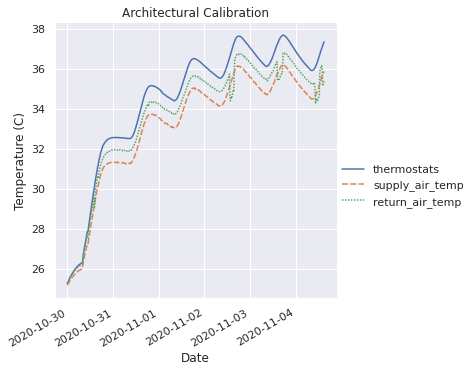

In [27]:
mech_temp_arch_cal_plot = sns.relplot(data=mech_temp_arch_cal_df, kind=kind, aspect=aspect)
mech_temp_arch_cal_plot.fig.autofmt_xdate()
mech_temp_arch_cal_plot.set(title='Architectural Calibration', xlabel=xlabel, ylabel=mech_temp_ylabel)

### Mechanical Calibration

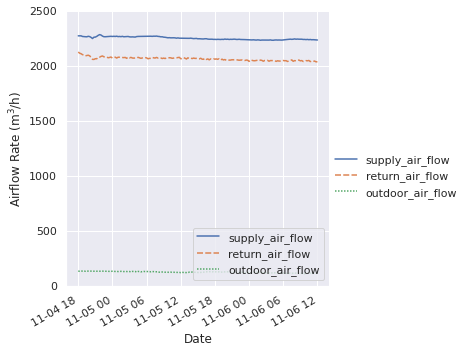

In [28]:
mech_flow_mech_cal_plot = sns.relplot(data=mech_flow_mech_cal_df['2020-11-04 18:00':'2020-11-06 12:00'], kind=kind) #, aspect=aspect)
mech_flow_mech_cal_plot.fig.autofmt_xdate()
mech_flow_mech_cal_plot.set(xlabel='Date', ylabel=mech_flow_ylabel, ylim=(0, 2500)) #title='Mechanical Calibration', 
mech_flow_mech_cal_plot.ax.legend(loc='lower right')

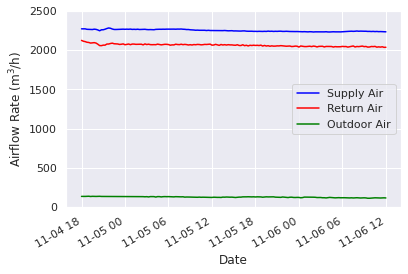

In [29]:
index = mech_flow_mech_cal_df['2020-11-04 18:00':'2020-11-06 12:00'].index
saf = mech_flow_mech_cal_df.loc['2020-11-04 18:00':'2020-11-06 12:00', 'supply_air_flow']
raf = mech_flow_mech_cal_df.loc['2020-11-04 18:00':'2020-11-06 12:00', 'return_air_flow']
oaf = mech_flow_mech_cal_df.loc['2020-11-04 18:00':'2020-11-06 12:00', 'outdoor_air_flow']

# create figure and axis
fig, ax = plt.subplots()

# set title and axis labels
# ax.set_title(title)
ax.set_xlabel('Date')
ax.set_ylabel(mech_flow_ylabel)

# add data
ax.plot(index, saf, label='Supply Air', color='blue')
ax.plot(index, raf, label='Return Air', color='red')
# ax.plot(index, saf-raf, label='SA-RA')
ax.plot(index, oaf, label='Outdoor Air', color='green')

# add legend
ax.legend(loc='center right') #bbox_to_anchor=(1, 1), loc='center right') #loc='best')

# format x-axis
ax.figure.autofmt_xdate()

# format y-axis
ax.set_ylim(ymin=0, ymax=2500)

# assign for saving
mech_cal_flow_fig = fig #.savefig(os.path.join(out_dir, 'mech_calibration_air_flow.png'), dpi=300, bbox_inches='tight')

In [30]:
mech_flow_mech_cal_df['2020-11-05':].describe()

,supply_air_flow,return_air_flow,outdoor_air_flow
count,157.000000,157.000000,157.000000
mean,2245.563767,2056.894734,122.451499
std,24.086641,22.388555,6.332951
min,1988.654573,1825.986167,100.681206
25%,2237.000065,2047.593961,116.858514
50%,2242.280136,2055.727632,123.499287
75%,2256.314267,2070.569756,127.815416
max,2270.628821,2080.366970,132.960374


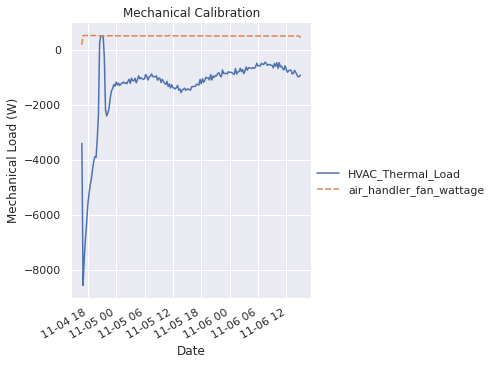

In [31]:
mech_power_mech_cal_plot = sns.relplot(data=mech_power_mech_cal_df, kind=kind, aspect=aspect)
mech_power_mech_cal_plot.fig.autofmt_xdate()
mech_power_mech_cal_plot.set(title='Mechanical Calibration', xlabel=xlabel, ylabel=mech_power_ylabel)

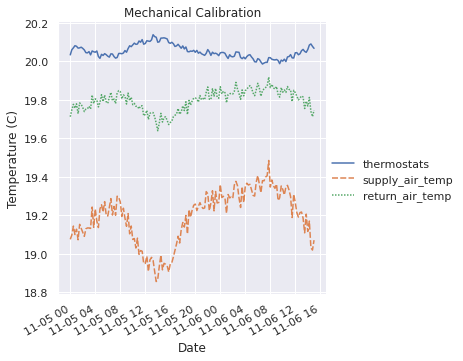

In [32]:
mech_temp_mech_cal_plot = sns.relplot(data=mech_temp_mech_cal_df['2020-11-05':], kind=kind, aspect=aspect)
mech_temp_mech_cal_plot.fig.autofmt_xdate()
mech_temp_mech_cal_plot.set(title='Mechanical Calibration', xlabel=xlabel, ylabel=mech_temp_ylabel)

In [33]:
mech_temp_mech_cal_df['2020-11-05':].describe()

,thermostats,supply_air_temp,return_air_temp
count,157.000000,157.000000,157.000000
mean,20.050319,19.193549,19.795796
std,0.033907,0.138196,0.054175
min,19.985763,18.856568,19.639471
25%,20.025134,19.103496,19.756512
50%,20.045718,19.217726,19.803404
75%,20.074541,19.299144,19.837576
max,20.138170,19.485179,19.918114


### AC Experiment

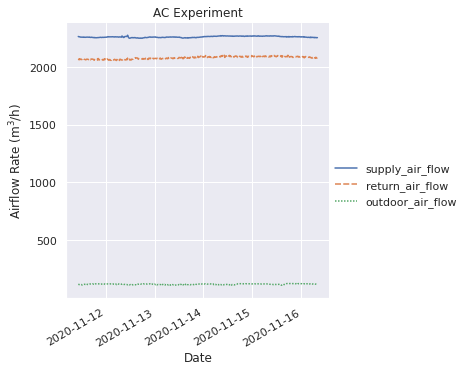

In [34]:
mech_flow_ac_exp_plot = sns.relplot(data=mech_flow_ac_exp_df, kind=kind, aspect=aspect)
mech_flow_ac_exp_plot.fig.autofmt_xdate()
mech_flow_ac_exp_plot.set(title='AC Experiment', xlabel=xlabel, ylabel=mech_flow_ylabel)

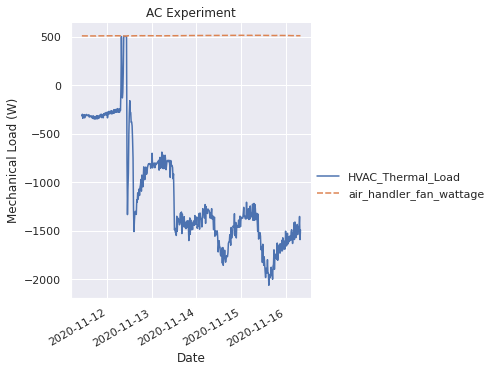

In [35]:
mech_power_ac_exp_plot = sns.relplot(data=mech_power_ac_exp_df, kind=kind, aspect=aspect)
mech_power_ac_exp_plot.fig.autofmt_xdate()
mech_power_ac_exp_plot.set(title='AC Experiment', xlabel=xlabel, ylabel=mech_power_ylabel)

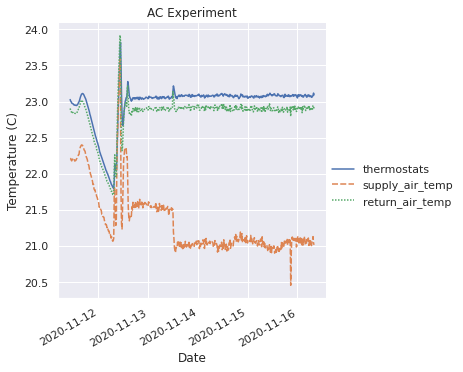

In [36]:
mech_temp_ac_exp_plot = sns.relplot(data=mech_temp_ac_exp_df, kind=kind, aspect=aspect)
mech_temp_ac_exp_plot.fig.autofmt_xdate()
mech_temp_ac_exp_plot.set(title='AC Experiment', xlabel=xlabel, ylabel=mech_temp_ylabel)

### DC Experiment

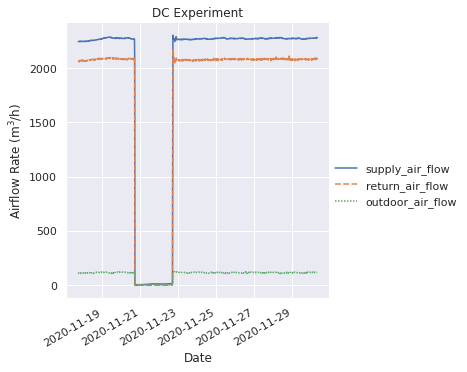

In [37]:
mech_flow_dc_exp_plot = sns.relplot(data=mech_flow_dc_exp_df, kind=kind, aspect=aspect)
mech_flow_dc_exp_plot.fig.autofmt_xdate()
mech_flow_dc_exp_plot.set(title='DC Experiment', xlabel=xlabel, ylabel=mech_flow_ylabel)

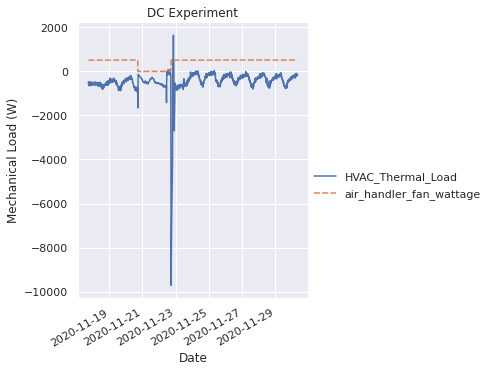

In [38]:
mech_power_dc_exp_plot = sns.relplot(data=mech_power_dc_exp_df, kind=kind, aspect=aspect)
mech_power_dc_exp_plot.fig.autofmt_xdate()
mech_power_dc_exp_plot.set(title='DC Experiment', xlabel=xlabel, ylabel=mech_power_ylabel)

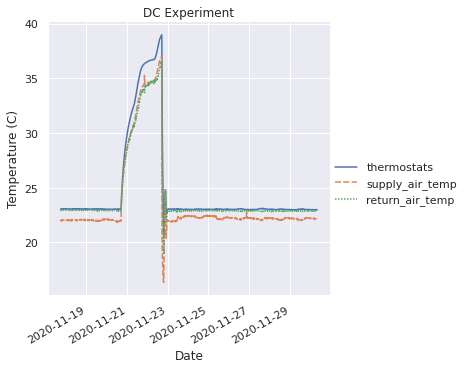

In [39]:
mech_temp_dc_exp_plot = sns.relplot(data=mech_temp_dc_exp_df, kind=kind, aspect=aspect)
mech_temp_dc_exp_plot.fig.autofmt_xdate()
mech_temp_dc_exp_plot.set(title='DC Experiment', xlabel=xlabel, ylabel=mech_temp_ylabel)

## Save Plots

In [40]:
# arch_cal_plot.savefig(os.path.join(out_dir, 'arch_cal_elec_fig.png'))
# mech_cal_plot.savefig(os.path.join(out_dir, 'mech_cal_elec_fig.png'))
# ac_exp_plot.savefig(os.path.join(out_dir, 'ac_exp_elec_fig.png'))
# dc_exp_plot.savefig(os.path.join(out_dir, 'dc_exp_elec_fig.png'))
elec_fig.savefig(os.path.join(out_dir, 'elec_loads.png'), bbox_inches='tight', dpi=300)
mech_cal_flow_fig.savefig(os.path.join(out_dir, 'calibration_mech_air_flow.png'), dpi=300, bbox_inches='tight')